## Lab 4: Eigenfaces

## Introduction
This lab is about how to extract eigen faces from a set of face images. There are two sets of images provided (train and test) and you will extract the eigenfaces from the train set. Afterwards, you will reconstruct images from the test set and calculate the difference between the original image and the reconstructed image.

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn import model_selection as ms
from sklearn.decomposition import PCA
from time import time

import numpy as np
import matplotlib.pyplot as plt

#### 1. Load the images here and create the training and test sets

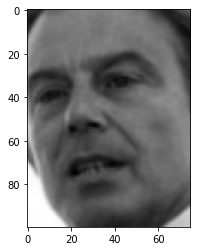

In [2]:
# get the images
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.8)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data

#normalize the images
X = X/255.

# create train and test sets
X_train = X[0:500]
X_test = X[500:550]

# show a random face
plt.imshow(X_train[20].reshape((100,75)),cmap='gray')

#### 2. Compute the mean face $m$ from 500 faces and take away the mean from all 500 face images to get 500 residual images $I$. Then, build a covariance matrix $C = I I^T$ where $I$ has the size 500x7500. 
Don't forget to normalize your covariance matrix by 7500.

Here, 7500 comes from the image size 75x100.

In this step, you need to find the covariance matrix on your own. You are not allowed to use the functions np.cov or similar. However, if you want, you can COMPARE your results with the np.cov() function to check if you found correctly.

In [29]:
def covariance(images):
  """
  This function takes the images matrix (X_train) as input and returns the
  residual images I, mean, and covariance matrix of it.
  """
  m = images.T.mean(axis=0)[:, None]
  I = images - m
  C = np.matmul(I, I.T) / 7500

  return I, m, C

I, m, C = covariance(X_train)



#### 3. Compute the eigenvalues $a$ and eigenvectors $U$ of the covariance matrix C where $C U = a U$ and show $a$, eigenvalues to see how important each eigenfaces are. Sort the eigenvectors according to corresponding eigenvalues in a descending order.


In [34]:


def compute_eigens(C):
  """
  This function takes the matrix C as input and returns the eigenvalues and
  eigenvectors of it. The eigenvectors must be sorted according to corresponding
  eigenvalues in a descending order.
  """
  eigenvalues, eigenvectors = np.linalg.eig(C)

  idx = np.argsort(eigenvalues)
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[idx]
  
  return np.flip(eigenvalues), np.flip(eigenvectors)

a, U = compute_eigens(C)


In [31]:
def compute_eigens(C):
  """
  This function takes the matrix C as input and returns the eigenvalues and
  eigenvectors of it. The eigenvectors must be sorted according to corresponding
  eigenvalues in a descending order.
  
  a = eigenvalues
  U = eigenvectors
  """
  eigenvalues, eigenvectors = np.linalg.eig(C)
  return eigenvalues,eigenvectors

a, U = compute_eigens(C)

#### 4. Compute the eigenfaces $E = W I$. Where $W$ has the first $k$ principal components of $U$.

In [18]:
def compute_eigenfaces(U,I,k):
  """
  This function takes the eigenvectors U, principal components k, and the images
  in the train set I as input, and returns eigenfaces.
  """
  E = np.matmul(U[:k],I)
  return E
  



#### 5. Compute the representation $J=b_1E_1+b_2E_2+...$ of 50 faces in the test set by choosing different number of eigenfaces $k$, $k = 1$ to $k = 50$ where $E$ is the matrix that includes eigenfaces and $b$ is the image in the test set.

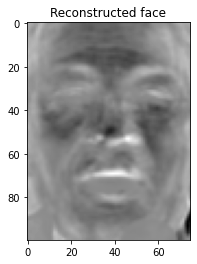

Text(0.5, 1.0, 'Original face')

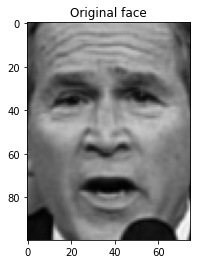

In [35]:
def compute_representation(E,m,b):
  """
  This function takes eigenfaces (E), mean face value (m) ,and images from the
  test set (b) as input and computes the new representations of them using
  eigenfaces. You need to add the mean face m to the reconstructed face.
  """
  m = np.mean(m)

  J = []
  for x_t in b:
    reconstructed_frame = np.zeros(7500)
    for e in E:
      reconstructed_frame += (e*x_t)

    reconstructed_frame /= len(E)
    reconstructed_frame += m
    
    J.append(reconstructed_frame)

  return J

k = 300
E = compute_eigenfaces(U,I,k)
J = compute_representation(E,m,X_test)

plt.imshow(J[20].reshape((100,75)),cmap='gray')
plt.title("Reconstructed face")
plt.show()
plt.imshow(X_test[20].reshape((100,75)),cmap='gray')
plt.title("Original face")


#### 6. Compute the average difference $D$ between original and reconstructed test images. Try this for different $k$ values in step 4 and draw a curve of $D$ with respect to different numbers of eigenfaces $k$ used to represent a face.

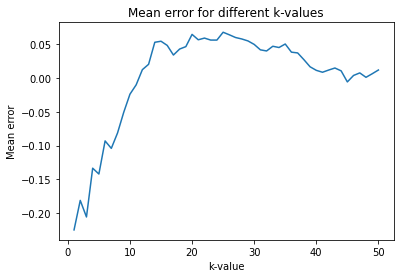

In [12]:
#for each k value

D_list = []
k_values = np.arange(1, 51)
for k in k_values:
  E = compute_eigenfaces(U,X_train,k)
  J = compute_representation(E,m,X_test)
  D = J-X_test
  D_list.append(np.mean(D))

plt.plot(k_values, D_list)
plt.title('Mean error for different k-values')
plt.xlabel('k-value')
plt.ylabel('Mean error')
plt.show()

## Report

Your report should fill the following criteria:
1. A first page with all your group members' names.
2. An explanation of how you found the covariance matrix, and eigenvalues and eigenvectors of it.  
3. A reconstructed image and original version of it.
4. The curve that you draw in the last step
5. Your entire notebook, with relevant images and string plotted and printed. 

Submit your report as a **single pdf**, combined from your text and your notebook.

Upload your report to “Assignments/Lab4”.

Deadline is 11 May 2021 23:59

